# Dogs vs Cats Redux

## About the dataset:

This dataset is from Kaggle Competition: 'Dogs vs. Cats Redux'.

## Preprocessing

**Setting up Google Colab.**

In [0]:
import tensorflow as tf 
device_name = tf.test.gpu_device_name() 
if device_name != '/device:GPU:0': raise SystemError('GPU device not found') 
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

**Importing the dataset**

In [0]:
# Uncompressing the dataset directly from Drive.
!unzip -qq '/content/drive/My Drive/Colab Notebooks/Internships/Dogs vs Cats/dogs-vs-cats-redux-kernels-edition.zip'

In [0]:
# Listing the contents of the directory after uncompressing the dataset.
!ls

drive  sample_data  sample_submission.csv  test.zip  train.zip


In [0]:
!unzip -qq 'train.zip'

In [0]:
!unzip -qq 'test.zip'

In [0]:
!ls

drive  sample_data  sample_submission.csv  test  test.zip  train  train.zip


**Preparing the Folder structure for Keras**

In [0]:
# Creating the folder hierarchy for Keras
import os, shutil

In [0]:
original_dataset_dir_train = 'train'

In [0]:
# Creating a base directory for the train and validation set.
base_dir = 'dogs_vs_cats'
os.mkdir(base_dir)

In [0]:
# Creating sub-directories in the base directory for train and validation set.
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [0]:
# Creating sub-directories in the train and validation directories for cats and dogs images.
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [0]:
# Splitting the training set 80-20, 80% for training and 20% for validation. 

In [0]:
# Here placing 80% cat images from train set to the cats directory in the train directory.
fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir_train, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
# Here placing remaining 20% cat images from train set to the cats directory in the validation directory.
fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir_train, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
# Here placing 80% dog images from train set to the dogs directory in the train directory.
fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir_train, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
# Here placing remaining 20% dog images from train set to the dogs directory in the validation directory.
fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir_train, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
# Performing a sanity check for the number of images in all the directories.
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 10000


In [0]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 10000


In [0]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 2500


In [0]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 2500


In [0]:
print('total test images:', len(os.listdir('test')))

total test images: 12500


# Building the model for Image Classification

**Making necessary imports**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from tensorflow import keras

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

Using TensorFlow backend.


In [0]:
from keras.preprocessing import image

In [0]:
from keras.preprocessing.image import ImageDataGenerator

**Making the model**

In [0]:
# Making the first model. 
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

**Data Preprocessing**

In [0]:
# Using Keras's ImageDataGenerator to preprocess the images.
# Here rescaling the image vector values to the range 0-1 for the train set.
train_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
# Rescaling the image vector values to the range 0-1 for the validation set.
validation_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
# Creating the train_generator which applies the above transformation to each image of the train set.
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=20, class_mode='binary')

Found 20000 images belonging to 2 classes.


In [0]:
# Creating the validation_generator which applies the above transformation to each image of the validation
# set.
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=20, class_mode='binary')

Found 5000 images belonging to 2 classes.


**Fitting data into the model**

In [0]:
# Fitting the model with train_generator and validation_generator to check our model's performance.
history = model.fit_generator(train_generator, steps_per_epoch=1000, epochs=30, 
                              validation_data=validation_generator, validation_steps=250)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
1000/1000 [==============================] - 140s 140ms/step - loss: 0.6571 - acc: 0.6027 - val_loss: 0.6064 - val_acc: 0.6748
Epoch 2/30
1000/1000 [==============================] - 134s 134ms/step - loss: 0.5298 - acc: 0.7367 - val_loss: 0.4633 - val_acc: 0.7770
Epoch 3/30
1000/1000 [==============================] - 134s 134ms/step - loss: 0.4351 - acc: 0.8001 - val_loss: 0.4056 - val_acc: 0.8174
Epoch 4/30
1000/1000 [==============================] - 135s 135ms/step - loss: 0.3681 - acc: 0.8375 - val_loss: 0.3628 - val_acc: 0.8366
Epoch 5/30
1000/1000 [==============================] - 137s 137ms/step - loss: 0.3229 - acc: 0.8621 - val_loss: 0.3353 - val_acc: 0.8492
Epoch 6/30
1000/1000 [==============================] - 134s 134ms/step - loss: 0.2776 - acc: 0.8789 - val_loss: 0.3335 - val_acc: 0.8610
Epoch 7/30
1000/1000 [==============================] - 133s 133ms/step - loss: 0.2430 - acc: 0.8995 - val_loss: 0.3116 - va

**Visualizing Accuracy and Loss against Epochs**

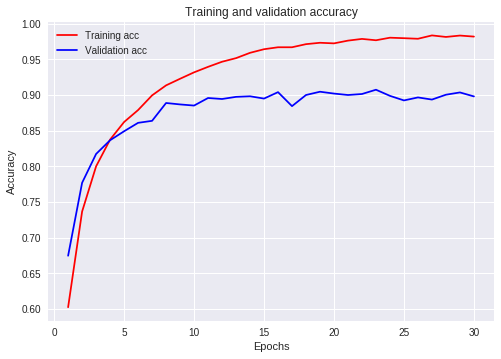

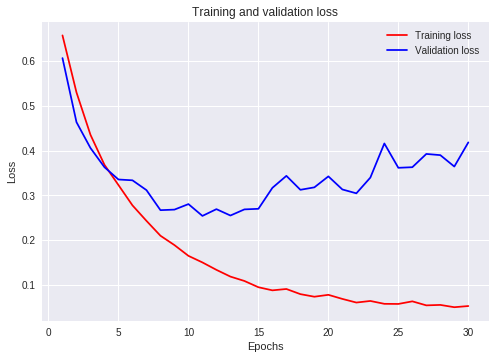

In [0]:
# Plotting train and validation accuracy and loss against epochs.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Data Augmentation**

In [0]:
# Performing Data Augmentation on the train set to reduce overfitting.
# It allows us to generate more training data from existing training samples, by augmenting the samples
# via a number of random transformations that yield believable-looking images. The goal is that at 
# training time, our model will never see the exact same picture twice. This helps expose the model to
# more aspects of the data and generalize better.
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, 
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

In [0]:
# Rescaling the image vector values to the range 0-1 for the validation set.
validation_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
# Creating the train_generator which applies the above transformation to each image of the train set.
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=20, class_mode='binary')

Found 20000 images belonging to 2 classes.


In [0]:
# Creating the validation_generator which applies the above transformation to each image of the validation set.
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=20, class_mode='binary')

Found 5000 images belonging to 2 classes.


In [0]:
# Fitting the model with train_generator and validation_generator to check our model's performance after
# Data Augmentation.
history = model.fit_generator(train_generator, steps_per_epoch=1000, epochs=20, 
                              validation_data=validation_generator, validation_steps=250)

Epoch 1/20
1000/1000 [==============================] - 233s 233ms/step - loss: 0.4289 - acc: 0.8082 - val_loss: 0.2606 - val_acc: 0.8922
Epoch 2/20
1000/1000 [==============================] - 229s 229ms/step - loss: 0.3652 - acc: 0.8378 - val_loss: 0.2532 - val_acc: 0.8946
Epoch 3/20
1000/1000 [==============================] - 230s 230ms/step - loss: 0.3367 - acc: 0.8516 - val_loss: 0.2712 - val_acc: 0.8794
Epoch 4/20
1000/1000 [==============================] - 233s 233ms/step - loss: 0.3309 - acc: 0.8537 - val_loss: 0.2495 - val_acc: 0.9010
Epoch 5/20
1000/1000 [==============================] - 232s 232ms/step - loss: 0.3197 - acc: 0.8580 - val_loss: 0.2314 - val_acc: 0.9034
Epoch 6/20
1000/1000 [==============================] - 228s 228ms/step - loss: 0.3089 - acc: 0.8634 - val_loss: 0.2446 - val_acc: 0.8998
Epoch 7/20
1000/1000 [==============================] - 229s 229ms/step - loss: 0.2968 - acc: 0.8680 - val_loss: 0.2144 - val_acc: 0.9062
Epoch 8/20
1000/1000 [============

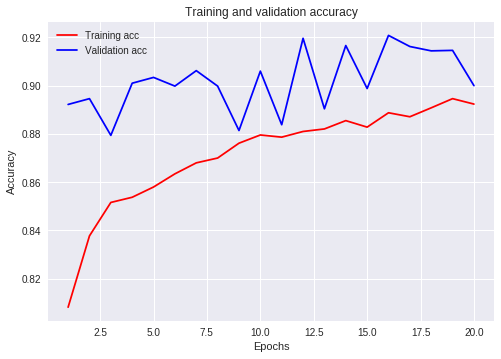

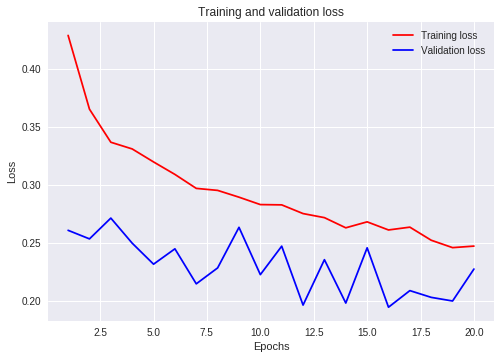

In [0]:
# Plotting train and validation accuracy and loss against epochs.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
# As we can see the overfitting is reduced after Data Augmentation. Will fit the model again to improve
# the results obtained above. Changing the batch_size from 20 to 32 in generators.

In [0]:
# Performing Data Augmentation again with different hyperparameters.
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, 
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

In [0]:
# Rescaling the image vector values to the range 0-1 for the validation set.
validation_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
# Creating the train_generator which applies the above transformation to each image of the train set.
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='binary')

Found 20000 images belonging to 2 classes.


In [0]:
# Creating the validation_generator which applies the above transformation to each image of the validation set.
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=32, class_mode='binary')

Found 5000 images belonging to 2 classes.


In [0]:
# Fitting the model with train_generator and validation_generator to check our model's performance after
# Data Augmentation.
history = model.fit_generator(train_generator, steps_per_epoch=625, epochs=20, 
                              validation_data=validation_generator, validation_steps=157)

Epoch 1/20
625/625 [==============================] - 215s 344ms/step - loss: 0.2291 - acc: 0.9026 - val_loss: 0.2050 - val_acc: 0.9168
Epoch 2/20
625/625 [==============================] - 214s 342ms/step - loss: 0.2236 - acc: 0.9041 - val_loss: 0.1930 - val_acc: 0.9170
Epoch 3/20
625/625 [==============================] - 215s 343ms/step - loss: 0.2251 - acc: 0.9048 - val_loss: 0.1734 - val_acc: 0.9342
Epoch 4/20
625/625 [==============================] - 214s 343ms/step - loss: 0.2179 - acc: 0.9082 - val_loss: 0.1951 - val_acc: 0.9216
Epoch 5/20
625/625 [==============================] - 213s 340ms/step - loss: 0.2215 - acc: 0.9052 - val_loss: 0.1786 - val_acc: 0.9280
Epoch 6/20
625/625 [==============================] - 210s 335ms/step - loss: 0.2158 - acc: 0.9088 - val_loss: 0.2011 - val_acc: 0.9174
Epoch 7/20
625/625 [==============================] - 213s 340ms/step - loss: 0.2145 - acc: 0.9090 - val_loss: 0.1728 - val_acc: 0.9288
Epoch 8/20
625/625 [============================

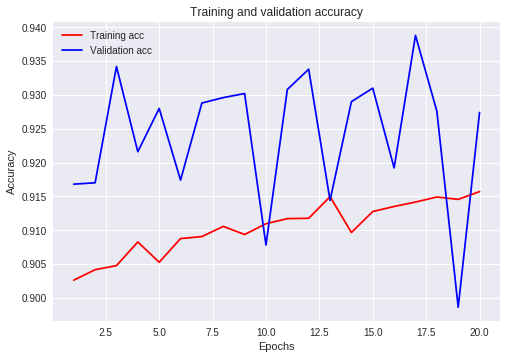

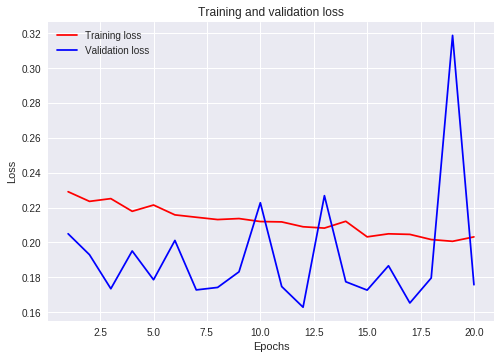

In [0]:
# Plotting train and validation accuracy and loss against epochs.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Model Performance**

This model gives a validation accuracy of more than 93%.

**Saving the model**

In [0]:
# Saving the model for futute use.
model.save('dogs_vs_cats.h5')

# To save to Google Drive.
model.save('/content/drive/My Drive/Colab Notebooks/Internships/Dogs vs Cats/dogs_vs_cats.h5')

**Further Improvement**

The performance of the model can be further improved by: 
1. Training the ANN for longer epochs like 100, but that will more than 6 hours for one training instance.
2. Using a Pretrained Convnet like Inception-v3, Inception-v4, Xception, VGG, ResNet etc. and fine-tuning its weights.

## Making Predictions on the Test set

**Preprocessing the test set and Making Predictions**

In [0]:
# Checking the indices for the diffrent classes.
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [0]:
# Making a list of all the image names in test set.
fnames_test = ['{}.jpg'.format(i) for i in range(1, 12501)]

In [0]:
predictions = []

In [0]:
# Preprocessing each image as per
for fname in sorted(fnames_test):
  img_path = os.path.join('test', fname)
  img = image.load_img(img_path, target_size=(150, 150))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img /= 255.
  result = model.predict(img)
  predictions.append(result[0][0])

In [0]:
# Creating a dataframe of image names, predictions, and labels.
pred_df = pd.DataFrame(pd.Series(predictions), columns=['label'])
pred_df.head()

,label
0,0.9829
1,0.0015
2,0.4433
3,0.9919
4,0.9449


In [0]:
# Exporting the predictions to a csv file.
pred_df.to_csv('/content/drive/My Drive/Colab Notebooks/Internships/Dogs vs Cats/Price_Prediction.csv', index_label='id')